# Raspberry Pi

There are 3 main steps to configure a brand new Raspberry Pi (Rpi):
1. Flash the clone image (from a working rpi)
2. Connect the Rpi to network and enable ssh
3. Run Pulse Script

## Clone Image to RPI

- Get a working rpi and clone the image to a computer, external drive or hard disk
- https://beebom.com/how-clone-raspberry-pi-sd-card-windows-linux-macos/
- Refer to this link on how to clone the image of an rpi
- Once that is done, you can install the image on the new rpi
- You can use apps like balenaEtcher or other apps that does the cloning for you
- Once all is cloned to the new rpi, we can set up the wifi in the rpi

## Set up Wifi

### 1. Setup using GUI

- The easiest way is to set up the wifi using GUI
- You can display the Rpi on a external monitor by connecting it via the mini-hdmi port
- Connect to nus wifi or any network you need like how you do it on your own computer

### 2. Setup using wpa_supplicant

- Navigate to the wpa_supplicant folder (/etc/wpa_supplicant)
- edit the wpa_supplicant file by typing _sudo vi wpa_supplicant.conf_ or _sudo nano wpa_supplicant.conf_ (can use wither vim or nano whichever suits you)
- You can set multiple network and set priority so the rpi will connect to the network with higher priority
- You can check the connectivity to wifi either by GUI or in the terminal, you can type _sudo ifconfig wlan0_
- You should see your network being connected and should be able to see an ip address (172.xx.xx.xx) for nus wifi and 192.xxx.xx.x for private network
- If you see none of these, you can reset the network antenna by running _sudo ifdown wlan0_ and _sudo ifup wlan0_
- If this still doesn't work, try to restart the rpi

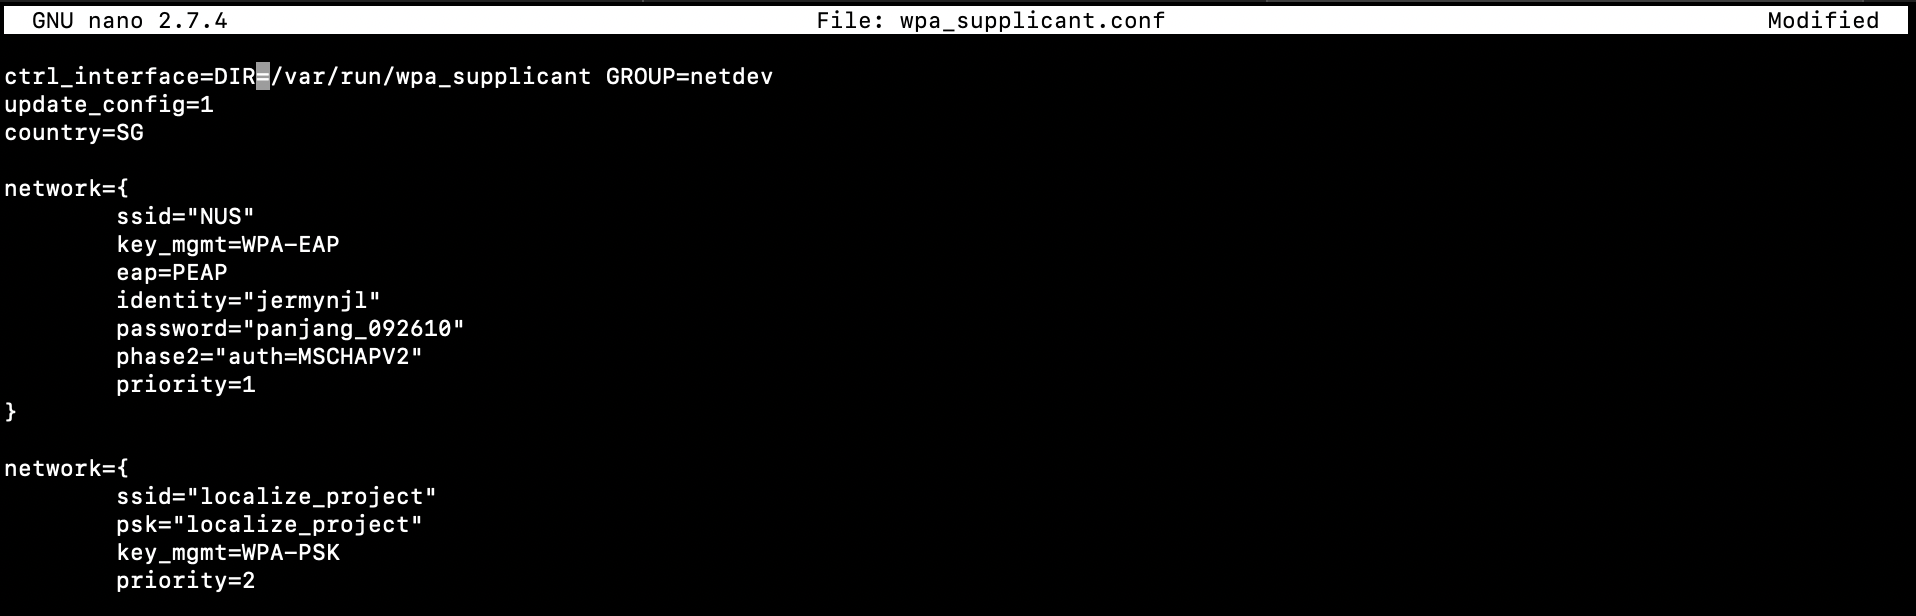

## Run Localisation Script - can refer to the localisation documentation to run the pulse script

If pulse script is run already, there are two ways to check if it is running properly:
1. Systemctl status
2. Anchor Status in Kibana

### 1. Systemctl status
- ssh into the rpi by typing _ssh pi@ip-address_, where ip-address is the ip address attach to the rpi when it is connected to the wifi
- You can get the ip address from the GUI or in the anchor status shown in kibana
- password is __snickers__
- since pulse script is run in the background via systemctl, you can check its status.
- run _sudo systemctl status pulse_
- You should see the following: 

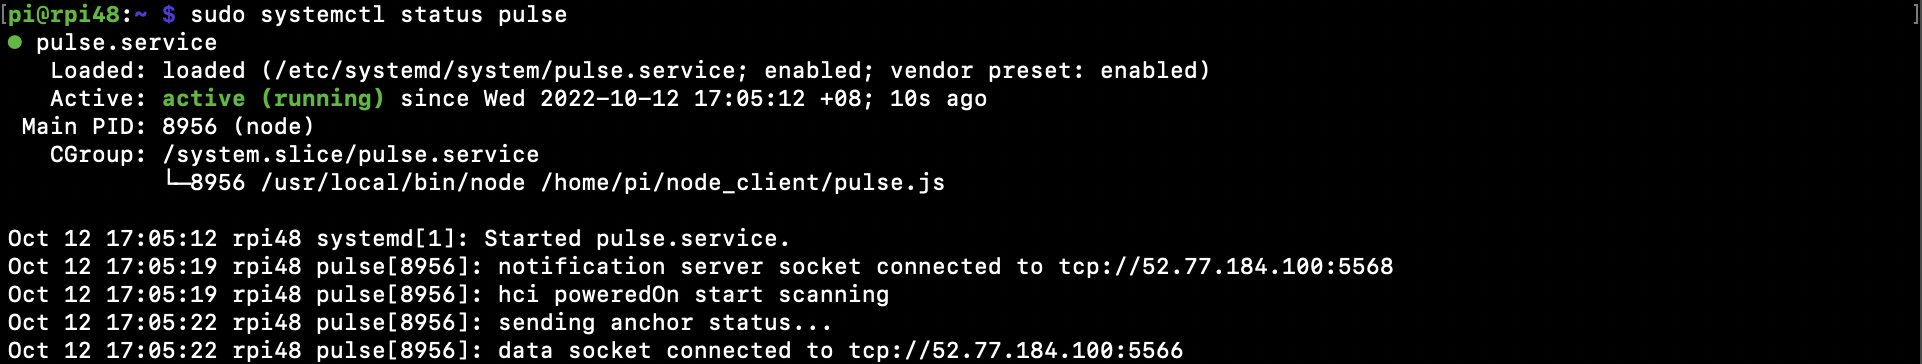

- if you see as shown above, these three logging: "notification server socket connected...", "sending anchor status", and "data socket connected..."
- it means the pulse script is running correctly
- if it is not running correctly, you can troubleshoot by running it in the foreground. Stop the pulse script by running _sudo systemctl stop pulse_
- And navigate to the node_client directory (~/node_client) and run _sudo node pulse_ and check the logging for any errors
- Once all is fixed, you can run the pulse script in the background via systemctl
- You can then check the anchor status in kibana

### 2. Anchor Status in Kibana

- Navigate to kibana (52.77.184.100:5601) and click the top left sidebar button
- Click visualise->Anchor Status
- You should see the rpi you just setup on the dashboard as follows:

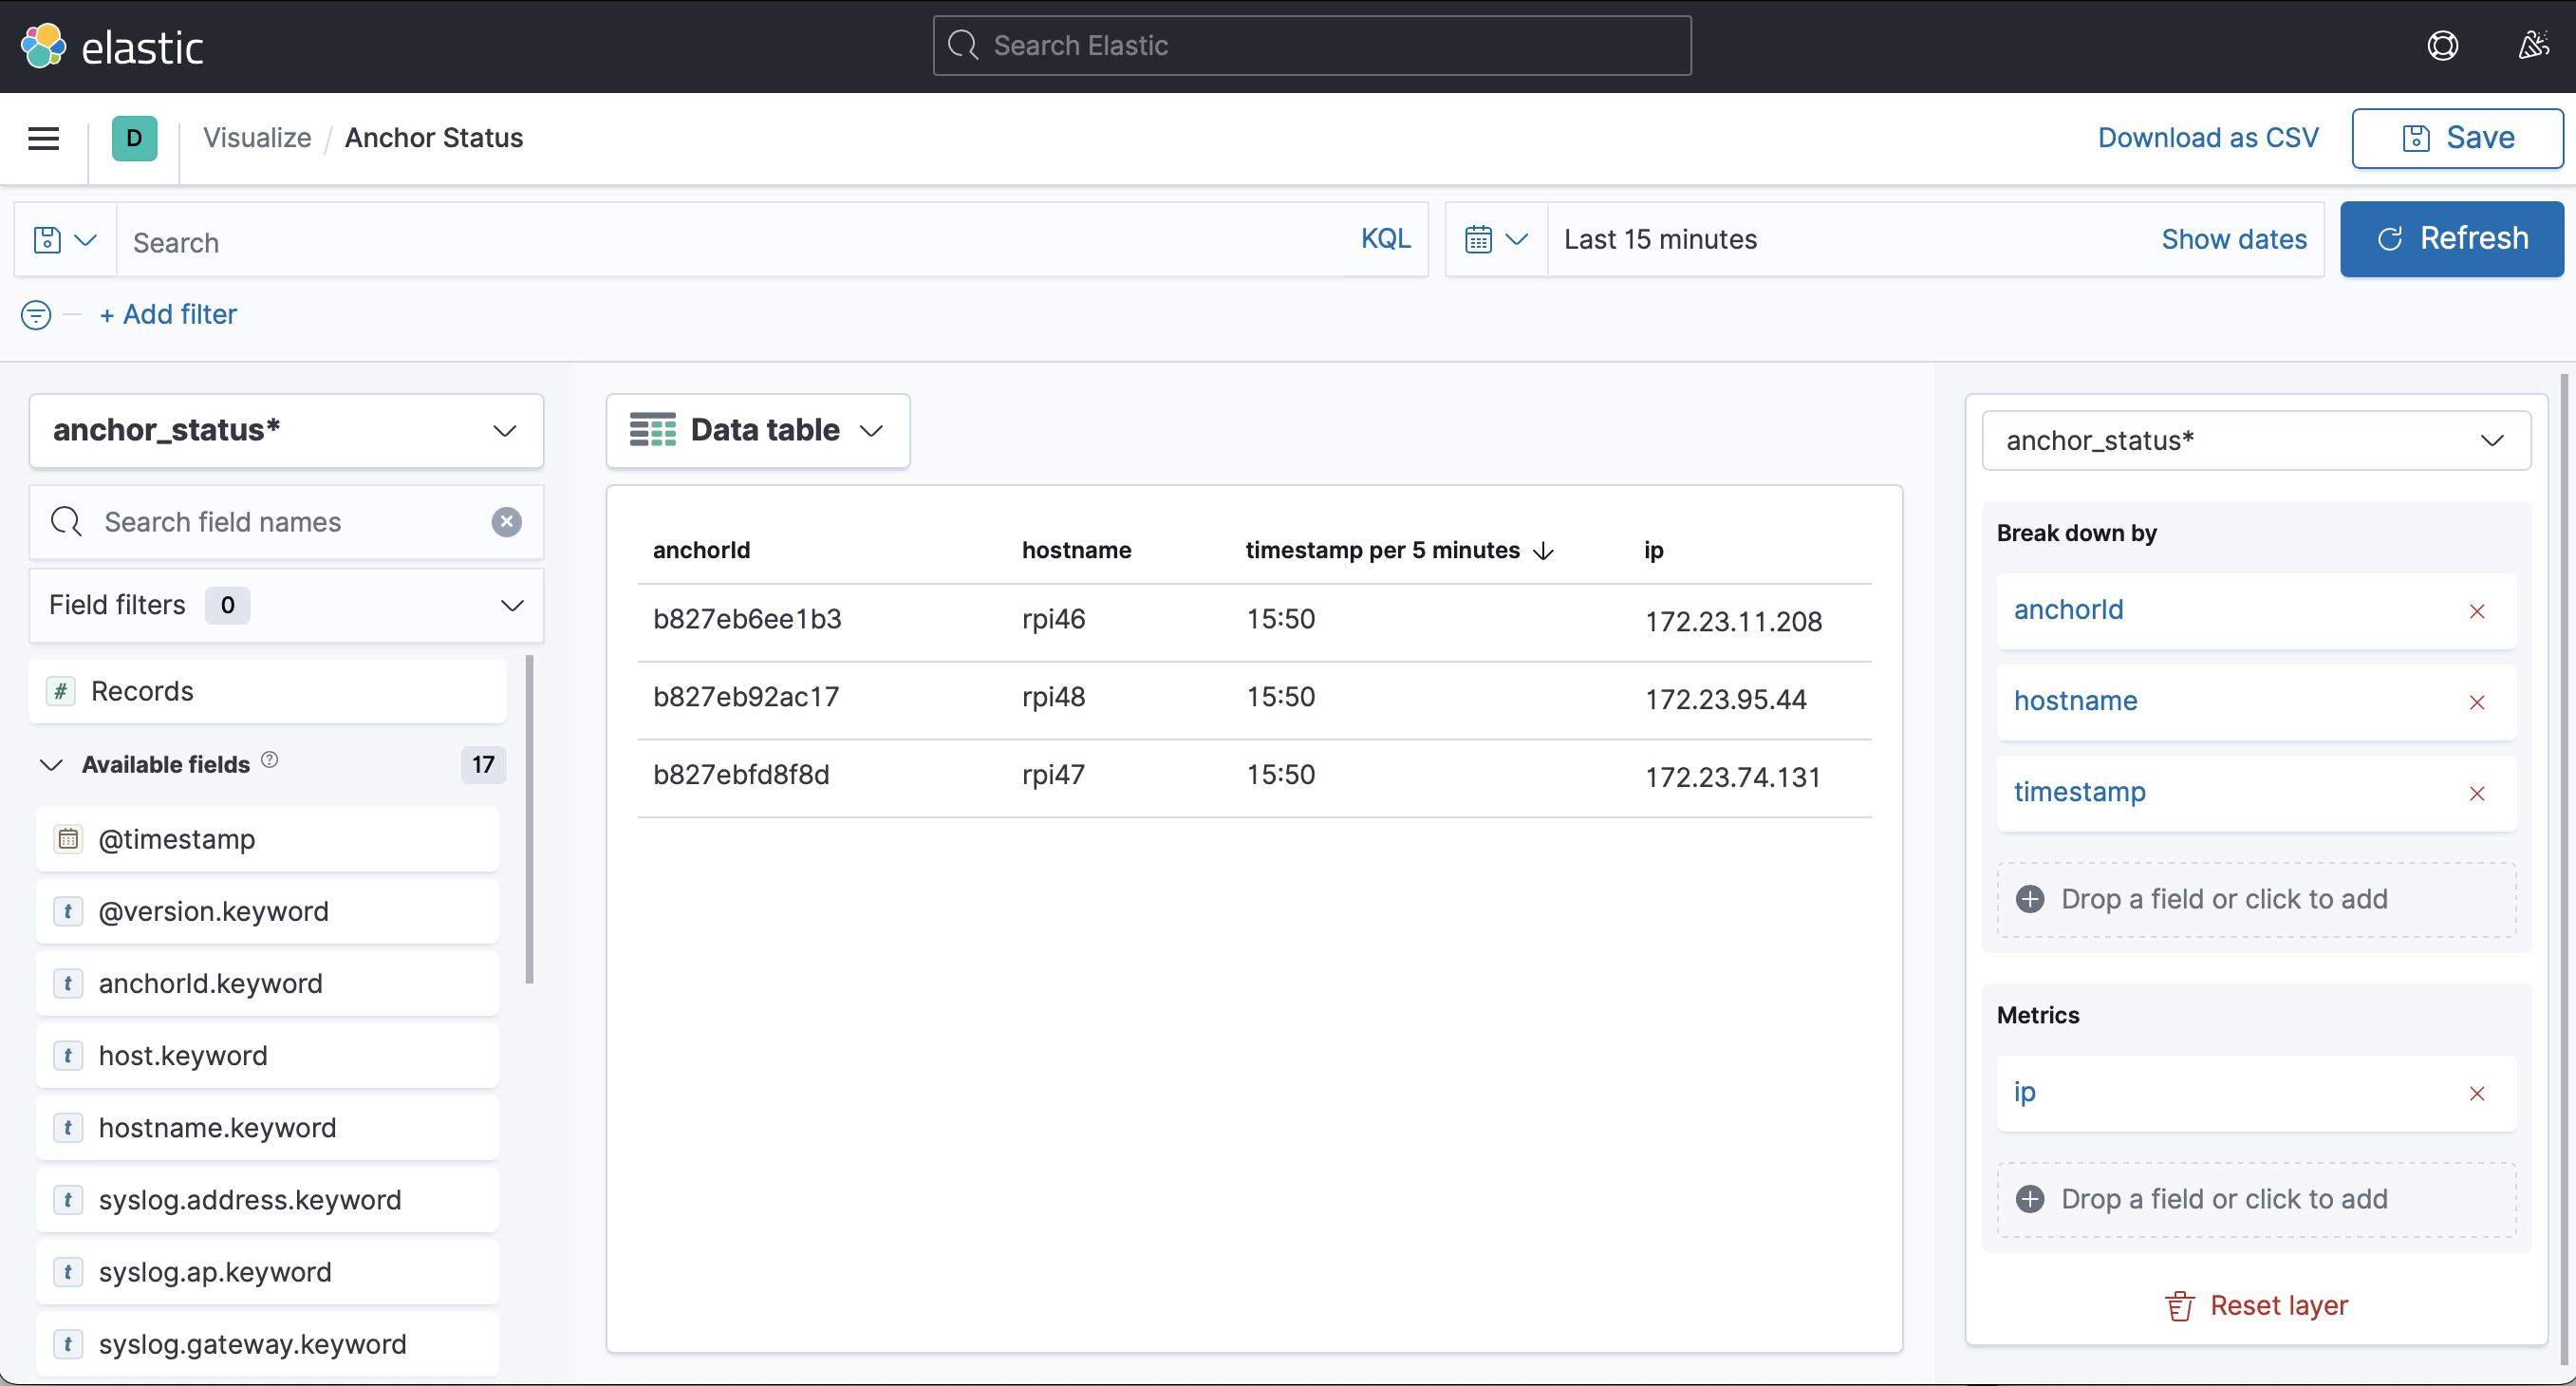

If it is not shown, you can troubleshoot in 4 ways:

1. Check kibana->Discover and choose Anchor Status topic and go to the date and time you want to check

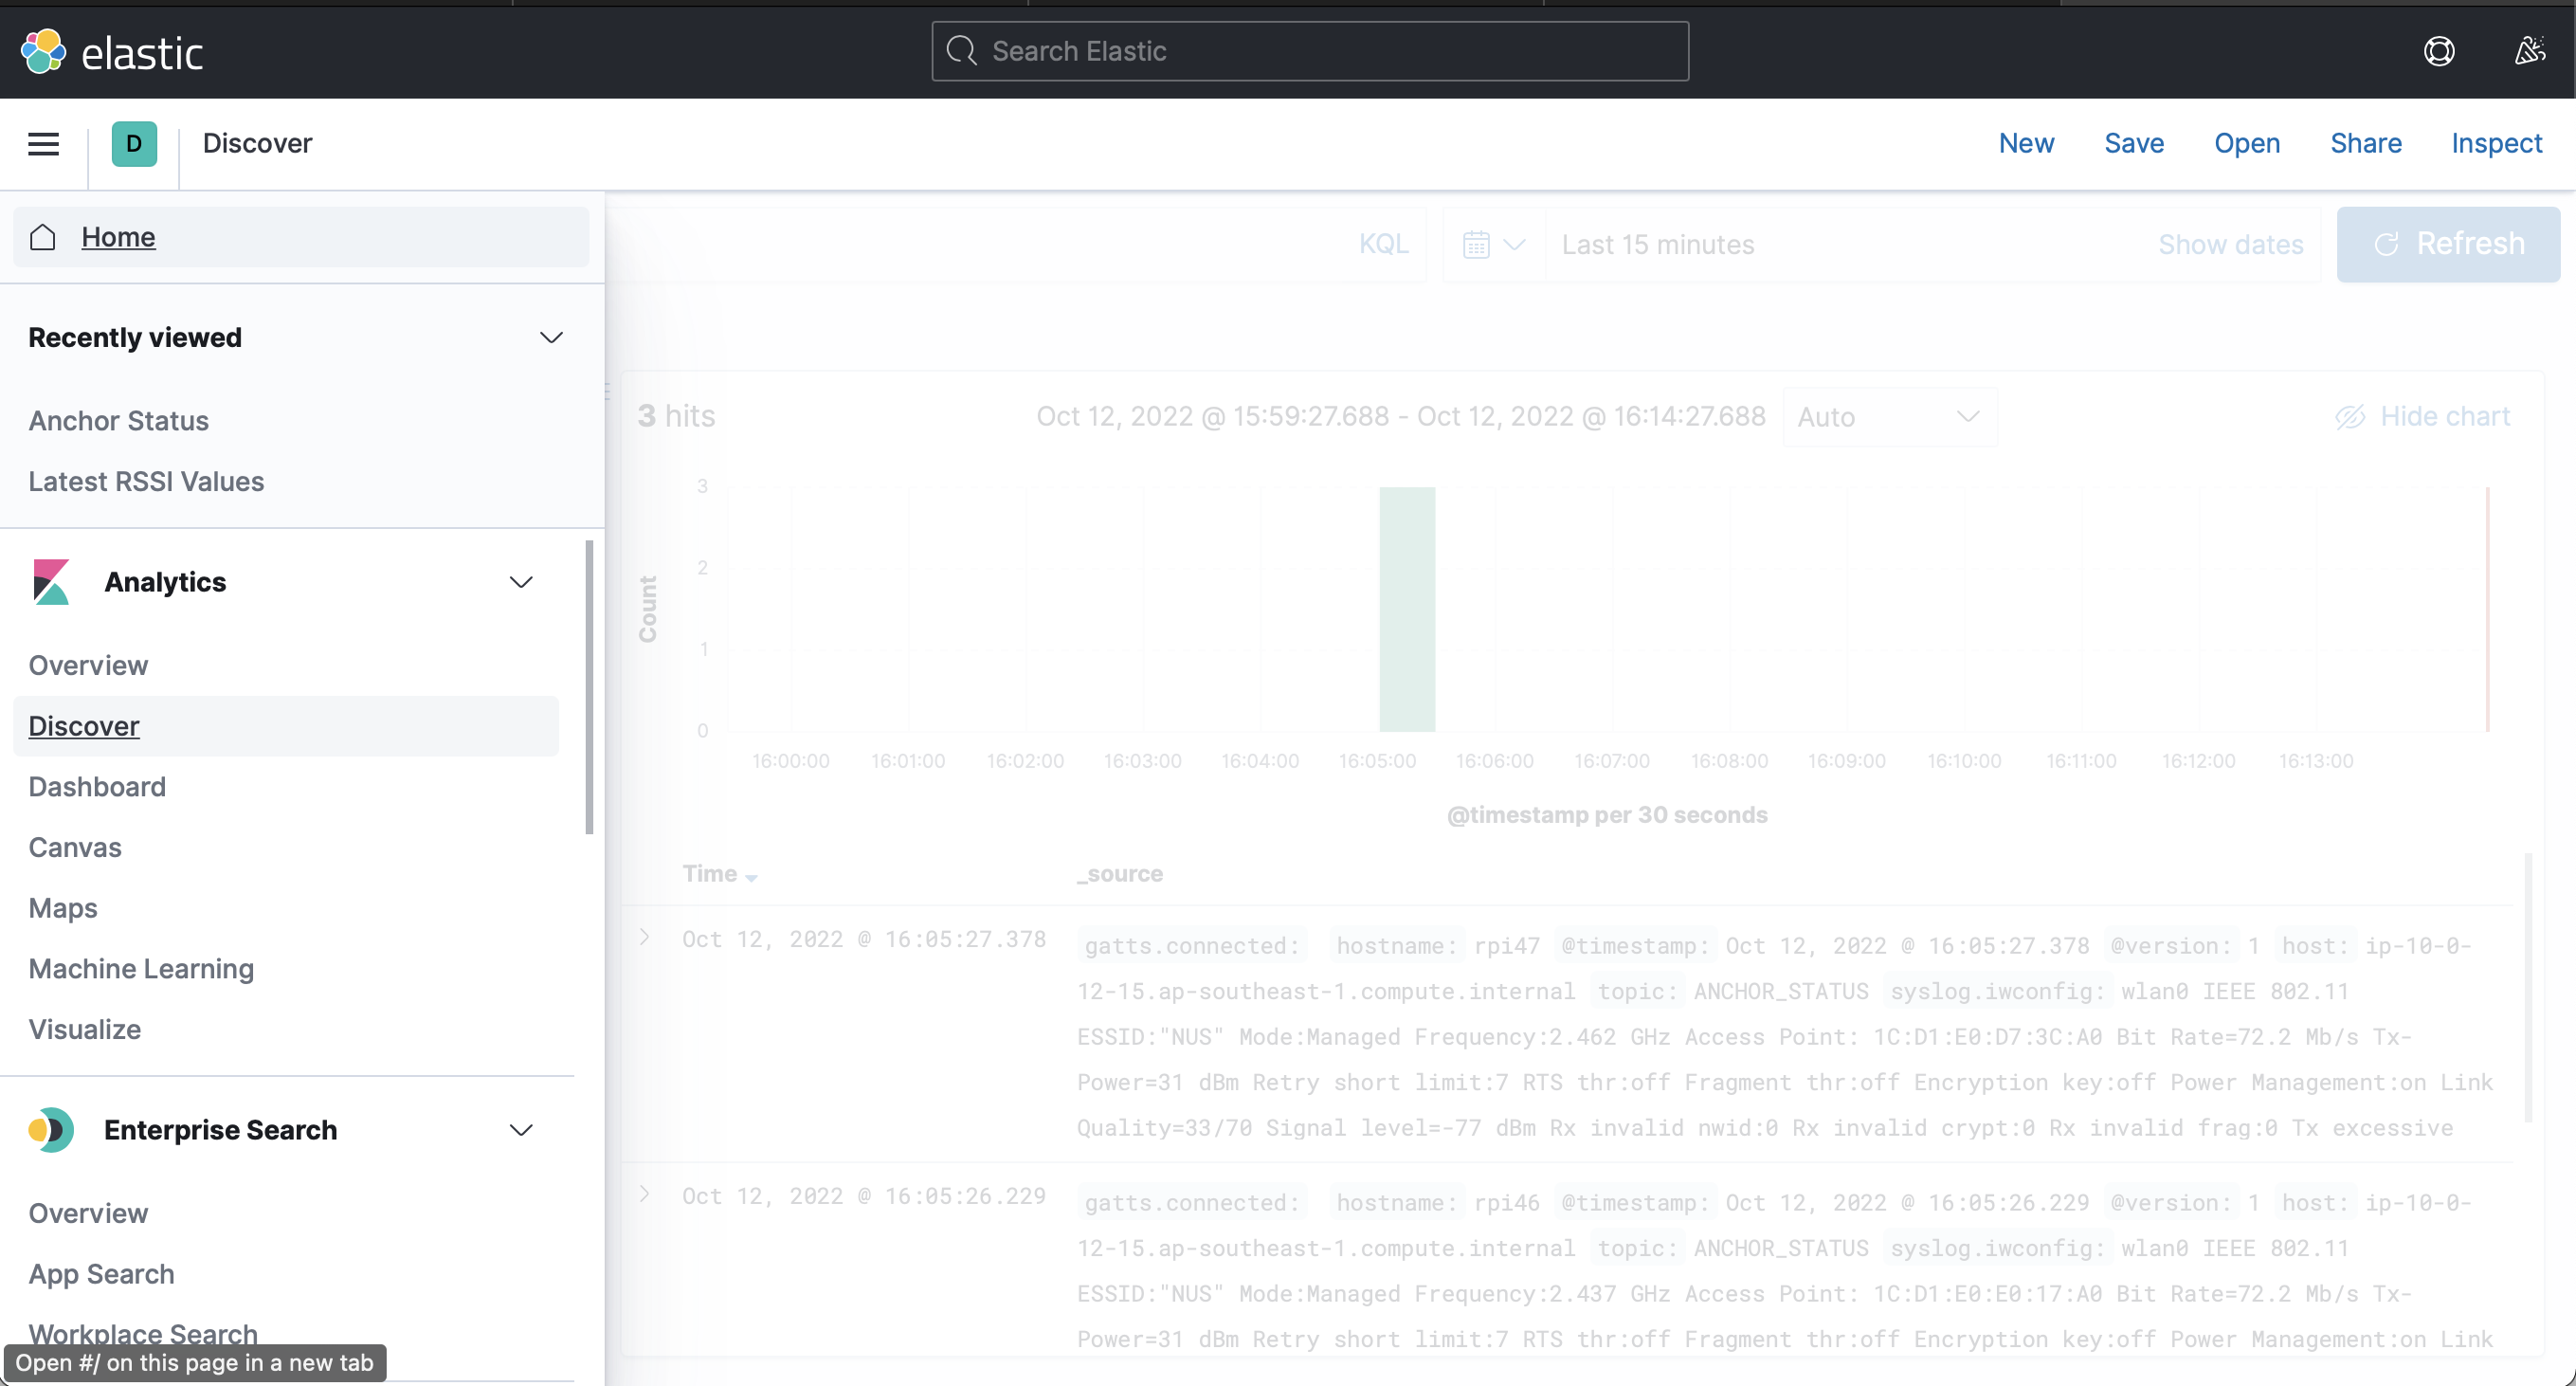

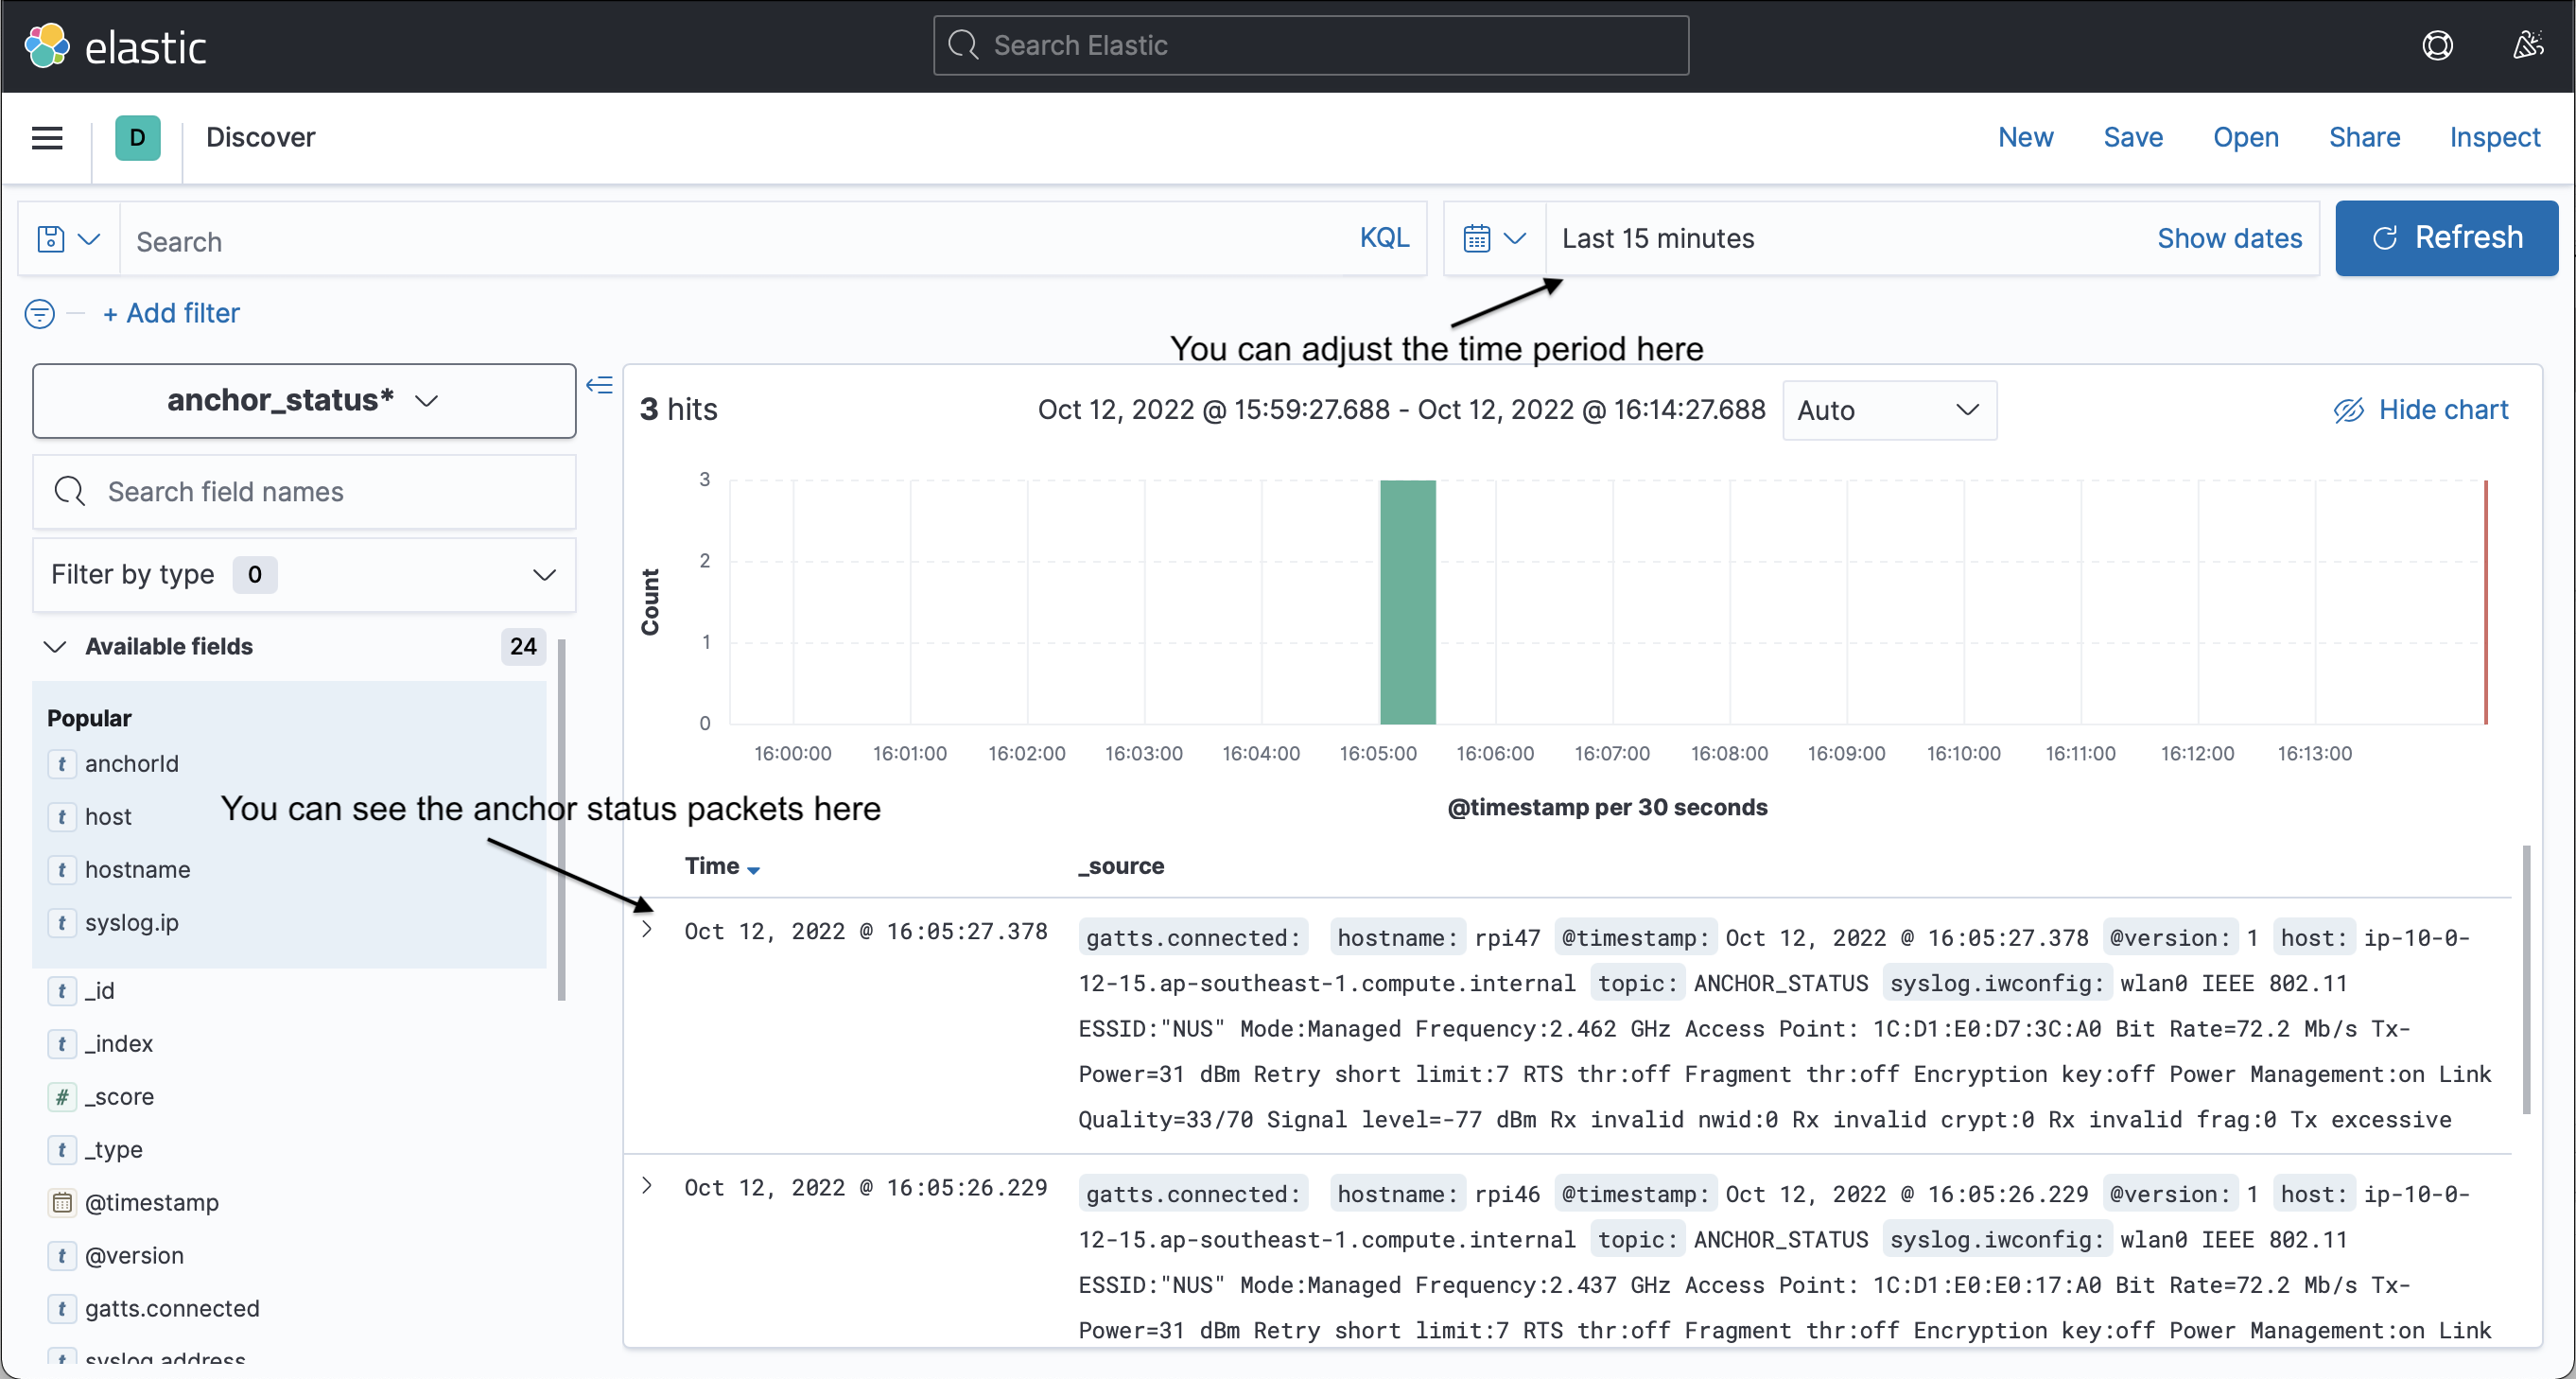

2. Check if the anchor is powered on properly

3. Check if the pulse script is running properly

4. If other rpi that usually works are also not sending the anchor status, perhaps the probelm lies with the notification server. You can restart the script by running _pm2 restart coffee_ (You can check first _pm2 list_ if the coffee script is running). Check the logging of the coffee script by running _pm2 monit_. 
- If there is any errors, you can run it locally by navigating to (indoor-localisation-2.0/notification-server) and run _sudo node server.js_ and check its logging.

### Check for RSSI Values

- After anchor status is being fixed, turn on the beacon and check for rssi readings from the rpi
- You can check the rssi packets in 2 main ways:
1. Kibana
2. RPI

#### 1. KIbana
- Go to Kibana->Visualise->RSSI Counts
- If it is running properly, you should see rssi counts shown for each rpi. You can change the time interval for each block, like 30 seconds per block or 1 min per block. Approximately, each block should have 0.5-1 count per second so for a one min block, the anchor should detect at least 30 rssi counts. If it is lower, it is either the anchor is in poor network position, or the beacon is too far, or some other issue with the anchor.

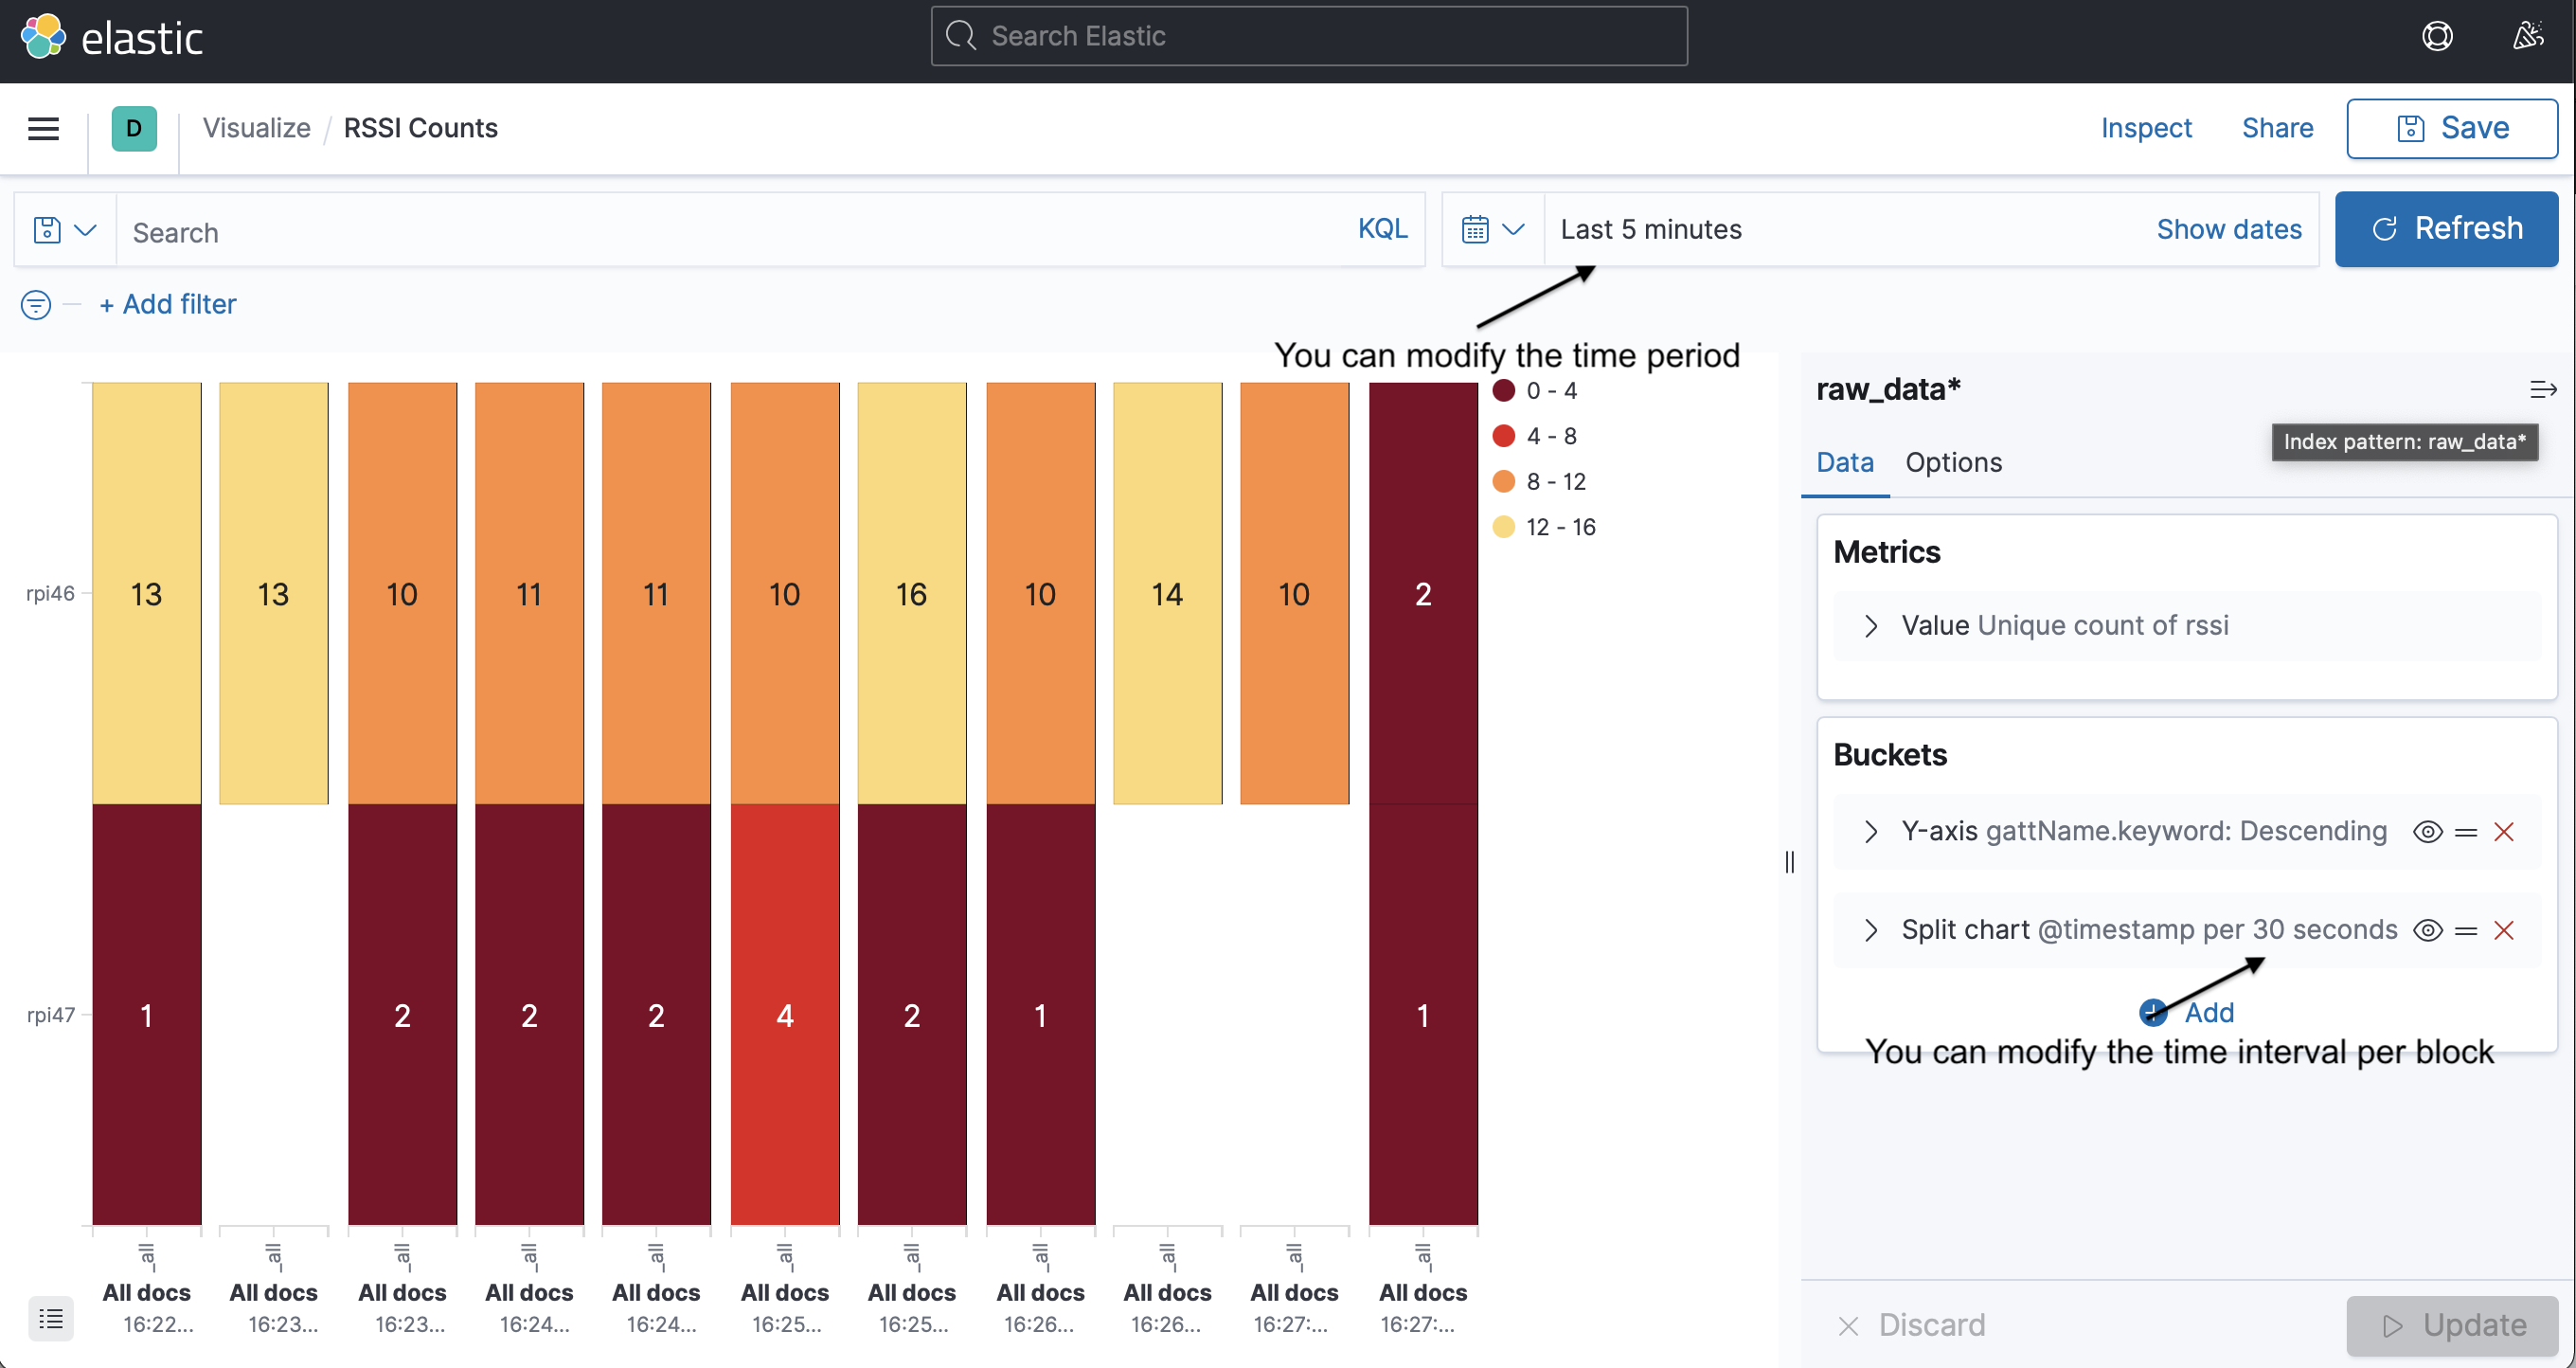

- Beside RSSI Counts, you can also check via other visualisations (Latest RSSI for Each Anchor, Lastest RSSI Values). You can also create your own visualisations if you like.

#### 2. RPI

- The way to check in rpi is similar to the systemctl status mentioned above.
- Ensure the pulse script is running and the beacon is turned on
- You can run _sudo systemctl status pulse_ and if there is rssi packets, you should see this logging, "Sending RSSI Packets..."
- Also, check the battery power of the beacon. Some battery might be flat.

## Remotely Control RPIs

These commands will be placed in a file called pssh_examples.sh

- To transfer files, we will use scp and ssh for remote login
- For multiple RPIs, we will use pscp and pssh respectively
- In these commands, there will be a "pssh_hosts" text file that the commnand will read from. You will need to key in the ip address(s) of the RPI(s) before running this command

### PSSH Commands

In [ ]:
# # Remote Shutdown

pssh  -O StrictHostKeyChecking=no \
       -O UserKnownHostsFile=/dev/null \
       -h pssh_hosts \
       -l pi -i \
       -A "shutdown now"

In [ ]:
# # stop pulse
pssh  -O StrictHostKeyChecking=no \
       -h pssh_hosts \
       -l pi -i \
       -A -P "sudo systemctl stop pulse; sudo systemctl status pulse"

In [ ]:
# # start pulse
pssh  -O StrictHostKeyChecking=no \
       -h pssh_hosts \
       -l pi -i \
       -A -P "sudo systemctl start pulse; sudo systemctl status pulse"

In [ ]:
# # restart pulse
pssh  -O StrictHostKeyChecking=no \
       -h pssh_hosts \
       -l pi -i \
       -A "sudo systemctl restart pulse; sudo systemctl status pulse"

In [ ]:
# # status pulse
pssh  -O StrictHostKeyChecking=no \
       -h pssh_hosts \
       -l pi -i \
       -A "sudo systemctl status pulse"

In [ ]:
# # stop pulse and run transmit for calibration

pssh  -O StrictHostKeyChecking=no \
       -h pssh_hosts \
       -l pi -i \
       -A -P "sudo systemctl stop pulse; cd /home/pi/node_client; sudo node transmit.js"

### PSCP Commands

- beside pssh_hosts file, you will need to key in the file you want to transfer over and the directory in the rpi to transfer to
- see below in option -A. _pulse.js_ is the script you modified in your local computer and _/home/pi/node_client_ is the directory of the pulse script you want to send over in the rpi. DO NOTE THAT YOUR SCRIPT HAVE TO BE IN SYNC WITH THE ONE IN THE RPI BEFORE CHANGING IF NOT THERE WILL BE VERSION CONFLICT.
- you will need to key in password everytime you run these commands, same as pssh above

In [ ]:
# # replace pulse.js
pscp  -O StrictHostKeyChecking=no \
     -O UserKnownHostsFile=/dev/null \
     -h pssh_hosts \
     -l pi \
     -A pulse.js /home/pi/node_client

In [ ]:
# # replace wpa_supplicant -- this one might not work due to the security
pscp -O StrictHostKeyChecking=no \
     -O UserKnownHostsFile=/dev/null \
     -h pssh_hosts \
     -l root \
     -A wpa_supplicant.conf /etc/wpa_supplicant

In [ ]:
# # update log.js
pscp  -O StrictHostKeyChecking=no \
     -O UserKnownHostsFile=/dev/null \
     -h pssh_hosts \
     -l pi \
     -A log.js /home/pi/node_client

In [ ]:
# # update aws_config.js
pscp  -O StrictHostKeyChecking=no \
     -O UserKnownHostsFile=/dev/null \
     -h pssh_hosts \
     -l pi \
     -A aws_config.json /home/pi/node_client/configs

## Pulse Script Overview

### Pulse Script Main Roles

1. Send Anchor Status to Server
2. Pick up on iBeacon RSSI and send to Server
3. Connect to Gatt Sensors (MacBeacon in pulse.js), Receive & Send Gatt Sensors Data to Server
4. Send another iBeacon RSSI packet to another port for localisation algoritm to process 

### Pulse Script Order of Events

#### At T0 - when pulse script is run
#### At T1 - Get syslog information
    - this will re-run at every minute
    - Syslog script is in log.js
    - This script supply important info to the rpi such as the hostname, ipaddress, and other info which will be sent to the server in the anchor status
#### At T2 - Sent request to Graphql to get RPI mac address and hostname (e.g. rpi27)
#### At T2.5 - Extract the map location where the anchor is in
#### At T3 - Get Anchor Status Info and Sent to Server
    - this will re-run at every 90 seconds later

The rest is run upon detection, no set time to run it.
- Noble: Bluetooth Library
    - Start when there is a state change detected, either start Scanning state or stop Scanning state vice versa

#### RSSI Detection
- Discover
    - Start when there is rssi signal detected from another device
    - partitioned into iBeacon and macBeacon
- iBeacon
    - when a device has the uuid of '77777777777777777777777777777777' and its major is 2 or 3
- GattBeacon
    - when the gatt device state is disconnected and the advertisement packet localname is one of the localname set by our current gatt sensors

#### Gatt Sensor Connection Procedure
- NobleConnect: connection observable to connect to gatt sensor
    - when it detect a gatt device trying to connect to it
- NobleDisconnect: disconnection observable
- NobleServices
    - after connection is established, it will discover services to see if the services of the gatt sensor match the one the rpi knows
- NobleCharacteristics
    - after the services matches, it will check if the characteristics matches also.
    - characteristics usually indicates which packet the rpi wants to pick up from the gatt sensor (e.g. data, battery life etc)
- NobleRead
    - after the characteristics matches, the rpi will proceed to receieve the data packet from the gatt sensor and after which, will send to server via the ZMQ port
    
#### ZMQ Socket Connection
- socketConnect
    - when pulse script start, it will try to check if a connection with the kibana socket is established
- notificationConnect
    - when pulse script start, it will try to check if a connection with the notification socket is established

There is a socket retry observable, but these doesn't work. It will be run when the connection with either kibana or notification sockets can't be established. And it will run in an endless loop and never recover back even if the connection is fixed.

So to prevent this, make sure you the kibana and notification server is up and running first before you run this pulse script.

## Other Important Tips

### ZMQ Config Ports

- one other important file is the aws_config.json, stored in the node_client/config
- this contains all the zmq socket ports the rpi will connect to
- so if you want to change any port or add new port or remove port or check which port is used, it is all in this file

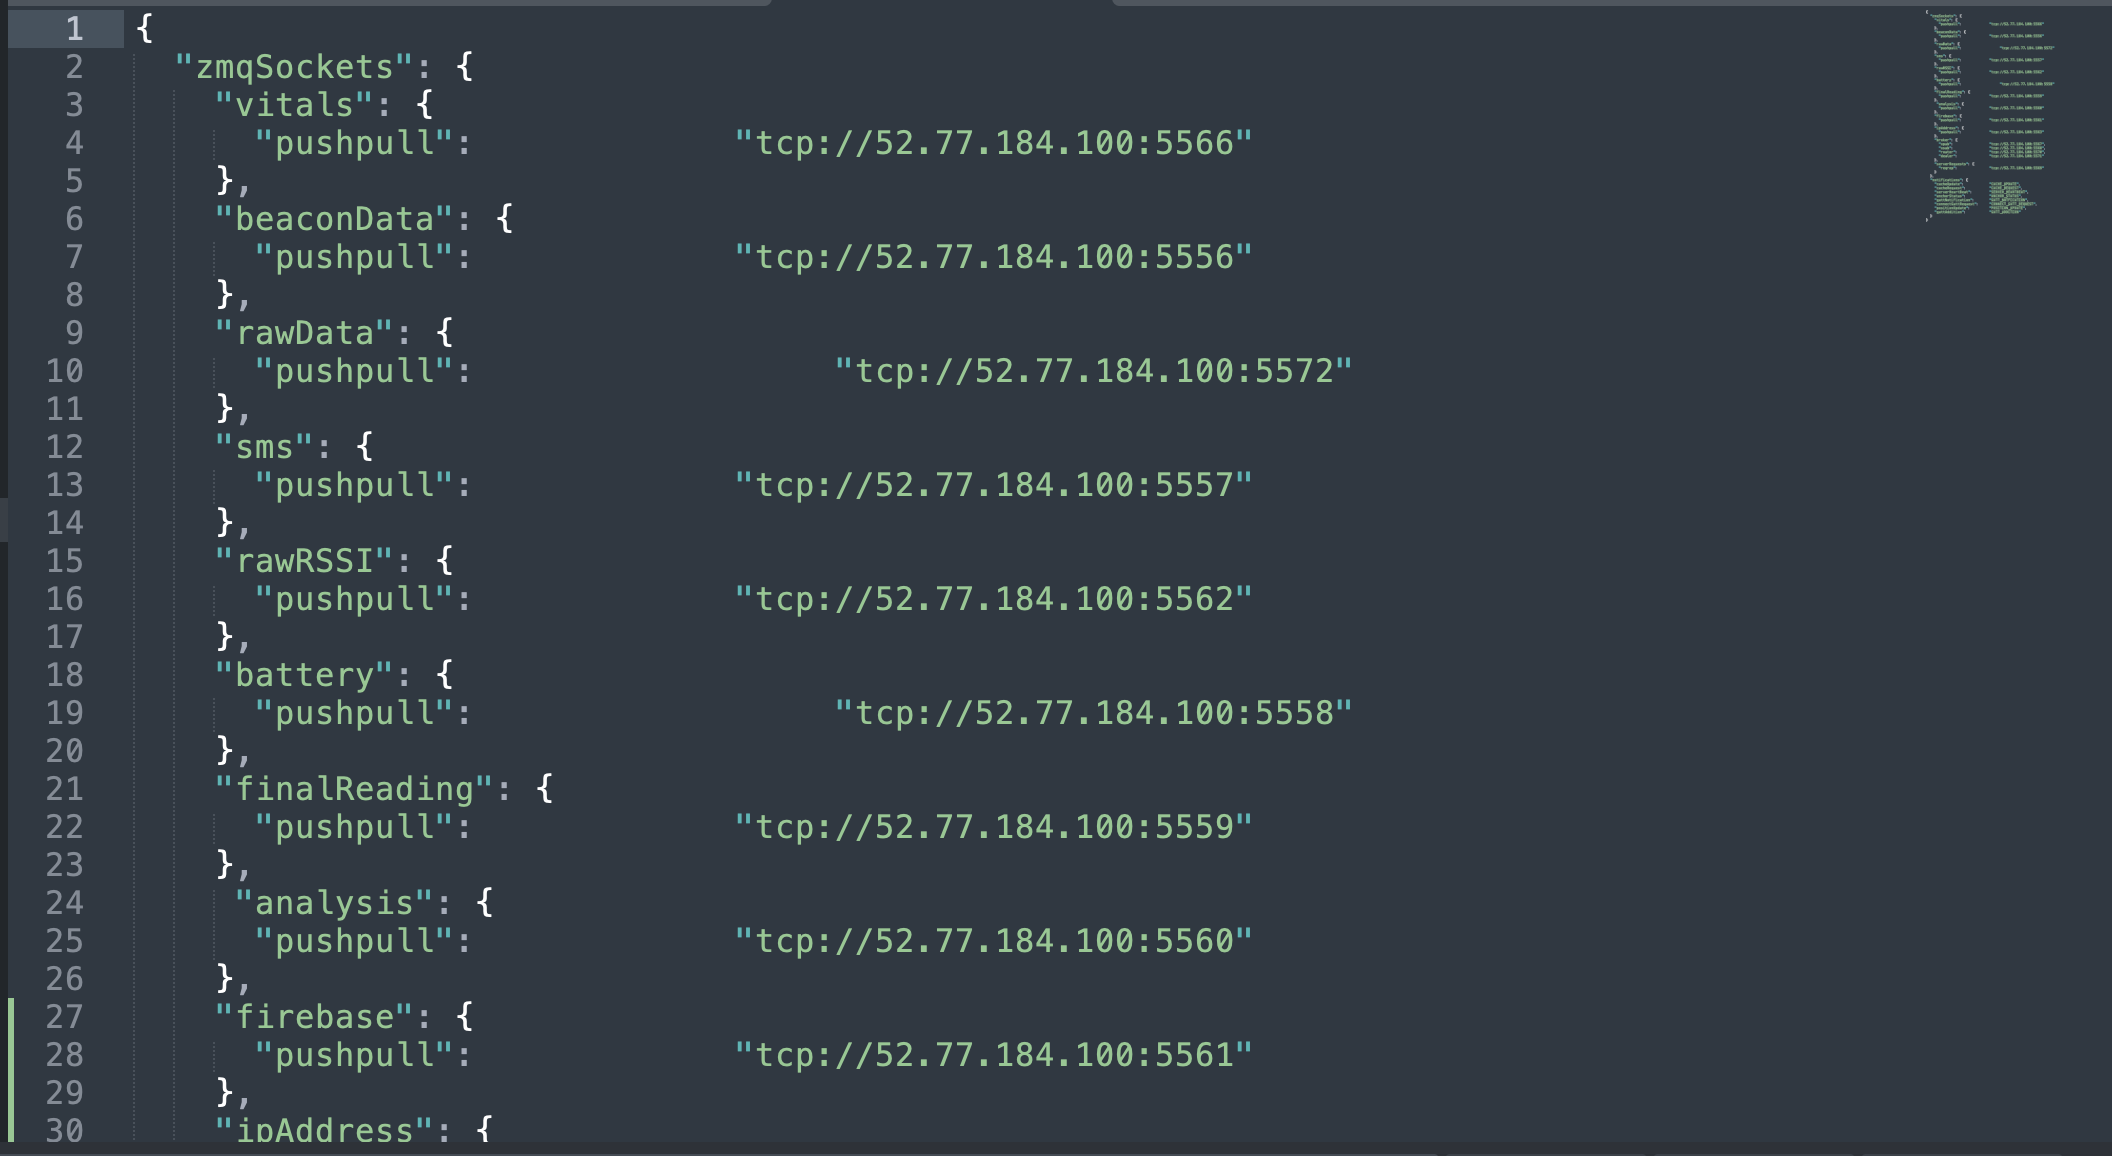

### IBeacon

This file is being used by pulse script in 2 ways:
1. Determine if the device the rpi detected the rpi is an ibeacon
2. Extract out the ibeacon information from a rssi packet such as uuid, major, minor, rssi and measured power